<span style ="font-size:35px;"> **Stanford Course CS229 - Lucas Jesus da Rocha** </span> 

<span style ="font-size:30px;"> **Linear Regression with one variable** </span> <div>

### Machine Learning Specialization by Andrew Ng 
***


In this part of this exercise, you will implement linear regression with one
variable to **predict profit** for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities. You would like to use this data to help you select which city to expand
to next.
The file **dataset1var.txt** contains the dataset for our linear regression problem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import axes3d, Axes3D


### **Plotting the data** 
***


Number of training examples: 97
(x^(4), y^(4)) = (5.8598, 6.8233)


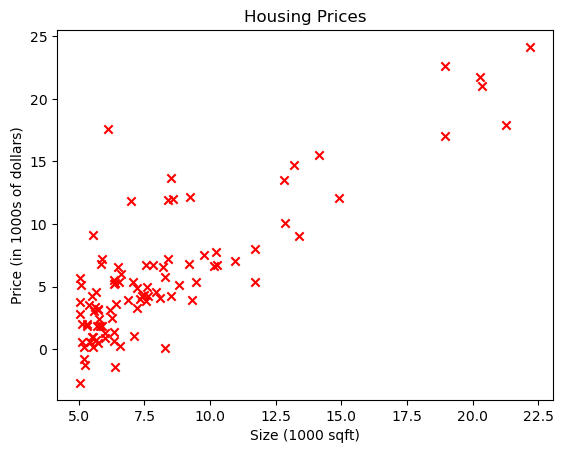

In [19]:
#loading the data
data = pd.read_csv('C:/Users/USER/Downloads/dataset1var.txt', names=['Population','Profit'])

#Features
x = data['Population']
#Target
y = data['Profit']
#Number of training examples
m = len(x)
print(f"Number of training examples: {m}")

#Training example x_4, y_4
i = 4
x_i = x[i]
y_i = y[i]

print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

plt.scatter(x, y, marker='x', c='r')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.show()

<span style ="font-size:20px;"> **Linear Regression and Cost Fuction** </span>
***
In this section, we will fit the linear regression parameters $ \theta $ to our dataset using gradient descent. We will also explore how to calculate the cost function, which measures the performance of our model.

The parameters $\theta_i$ (also called weights) define the space of linear functions that map from $ X $ to $ Y $. The hypothesis function $ h_\theta(x) $ for a linear regression model can be expressed as:

$$ h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 $$

To represent hypotheses $ h $ in a computer, we use the convention of including $ x_0 = 1 $ (for the intercept term). This allows us to write:

$$ h(x) = \sum_{i=0}^{d} \theta_i x_i = \theta^T x $$

where $ \theta $ is the vector of parameters and $ x $ is the feature vector.

### Cost Function
***
To measure how well our hypothesis $ h(x) $ approximates the true values $ y $, we define the cost function. The normalized cost function $ J(\theta) $ is given by:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 $$

where $ m $ is the number of training examples.

### Gradient Descent Algorithm Definition
***
The goal is to minimize the cost function $ J(\theta) $ by adjusting the parameters $ \theta_j $. One common method to achieve this is through batch gradient descent. In each iteration of batch gradient descent, the parameters are updated as follows:

$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) $$

where $ alpha $ is the learning rate. By substituting the cost function $ J(\theta) $ into the gradient and deriving, we get the update rule:

$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)} $$






### Implementation 
***
We store each training example as a row in the $ X $ matrix. To account for the intercept term $\theta_0$, we prepend an additional column of ones to $ X $. This modification allows us to treat $\theta_0$ as just another feature in our model:
​


In [20]:
x = np.c_[np.ones(m), x] #input x0 (set to 1) plus the real ones 
#Initialize fitting parameters 
theta = np.zeros(2)
itera = 1500
alpha = 0.01
print(theta)
print(x)
print(x.shape)
print(theta.shape)

[0. 0.]
[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1

### Computing the cost $ J(\theta) $
***
As you perform gradient descent to learn minimize the cost function J(θ),
it is helpful to monitor the convergence by computing the cost. In this
section, you will implement a function to calculate J(θ) so you can check the
convergence of your gradient descent implementat.ion

In [21]:
def compute_cost(x,y, theta):
    cost = 0
    cost = (1 / (2 * m)) * np.sum((np.dot(x, theta) - y) ** 2)
    return cost

print("The initial cost is: " + str(compute_cost(x,y, theta)))


The initial cost is: 32.072733877455676


### Gradient Descent Implementation
***

In [22]:
def GradientDescent(x, y, m, alpha, theta, itera):
    J_history = np.zeros(itera) #to store the costs 
    
    for i in range (0, itera):
        hipoteses = np.dot(x,theta)
        error = np.asarray(hipoteses - y) 
        theta -= (alpha) * (1 / m) * np.sum( error[:, np.newaxis] * x, 0) 
        J_history[i] = compute_cost(x,y, theta)
    return theta, J_history

theta, J_history = GradientDescent(x, y, m, alpha, theta, itera)
print("Theta found by Gradient Descent:", theta)
print("We can see that the algorithm is correctly running (always decreasing the cost):", J_history)


Theta found by Gradient Descent: [-3.63029144  1.16636235]
We can see that the algorithm is correctly running (always decreasing the cost): [6.73719046 5.93159357 5.90115471 ... 4.48343473 4.48341145 4.48338826]


### Linear Fit Plot 
***

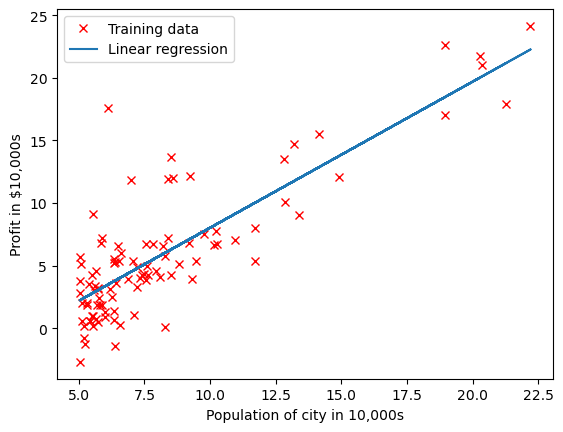

In [23]:
plt.figure(0) 
plt.plot(x[:, 1], y, 'rx', label='Training data')
line1 = plt.plot(x[:, 1], np.dot(x, theta), label='Linear regression')  # Plot regression line
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend()


### Predicting for Population sizes of 35,000 and 70,000
***

In [24]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot(np.array([1,3.5]), theta) * 10000
print("For population = 35,000, we predict a profit of:", predict1)
predict2 = np.dot(np.array([1, 7]), theta) * 10000
print("For population = 70,000, we predict a profit of:", predict2)

For population = 35,000, we predict a profit of: 4519.7678677017675
For population = 70,000, we predict a profit of: 45342.45012944714


### Visualizing $ J(\theta) $
***

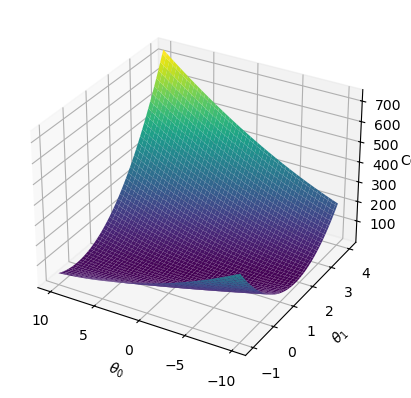

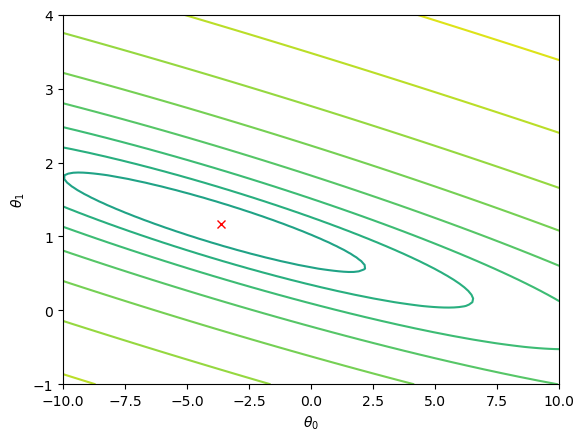

Finished. Press ENTER to exit 


''

In [31]:
# Given Dimensions (they are not the optimized values from Gradient Descent algorithm)
theta0_vals = np.linspace(10, -10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# Creating grids of points
xs, ys = np.meshgrid(theta0_vals, theta1_vals)

# Matrix
J_vals = np.zeros(xs.shape)

# Filling values of J
for i in range(theta0_vals.size):
    for j in range(theta1_vals.size):
        thetas = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = compute_cost(x, y, thetas)
J_vals = np.transpose(J_vals) #transforming in a column vector so that its dimensions match 'xs' and 'ys' grids for plotting.

# 3D plot
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.plot_surface(xs, ys, J_vals, cmap='viridis')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('Cost')

# Inverter o eixo Y
ax.invert_xaxis()

plt.show()



# Contour Plot
plt.figure()
lvls = np.logspace(-2, 3, 20)
plt.contour(xs, ys, J_vals, levels=lvls, norm=LogNorm())
plt.plot(theta[0], theta[1], 'rx')  # From the Gradient Descent
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

plt.show()

input('Finished. Press ENTER to exit')
